In [2]:
import pandas as pd
csd = pd.read_csv('customer_segmentation_data.csv')
csd.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


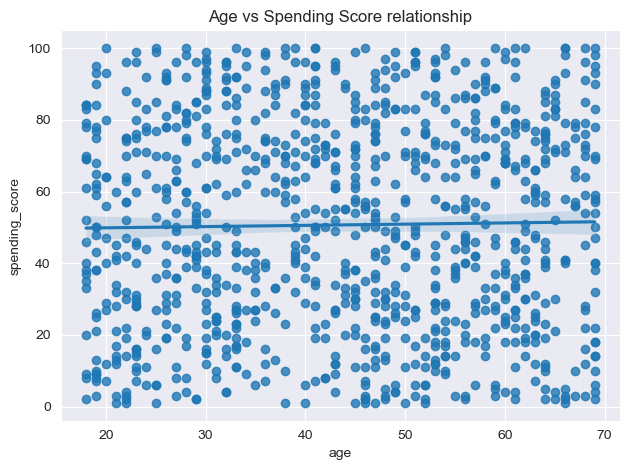

In [3]:
# Relationship between and spending score
import matplotlib.pyplot as plt
import seaborn as sns

age, spending_score = csd['age'], csd['spending_score']

sns.regplot(x=age, y=spending_score)
plt.title('Age vs Spending Score relationship')
plt.tight_layout()
plt.savefig('age_spending_score.png')
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5880\1781600226.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


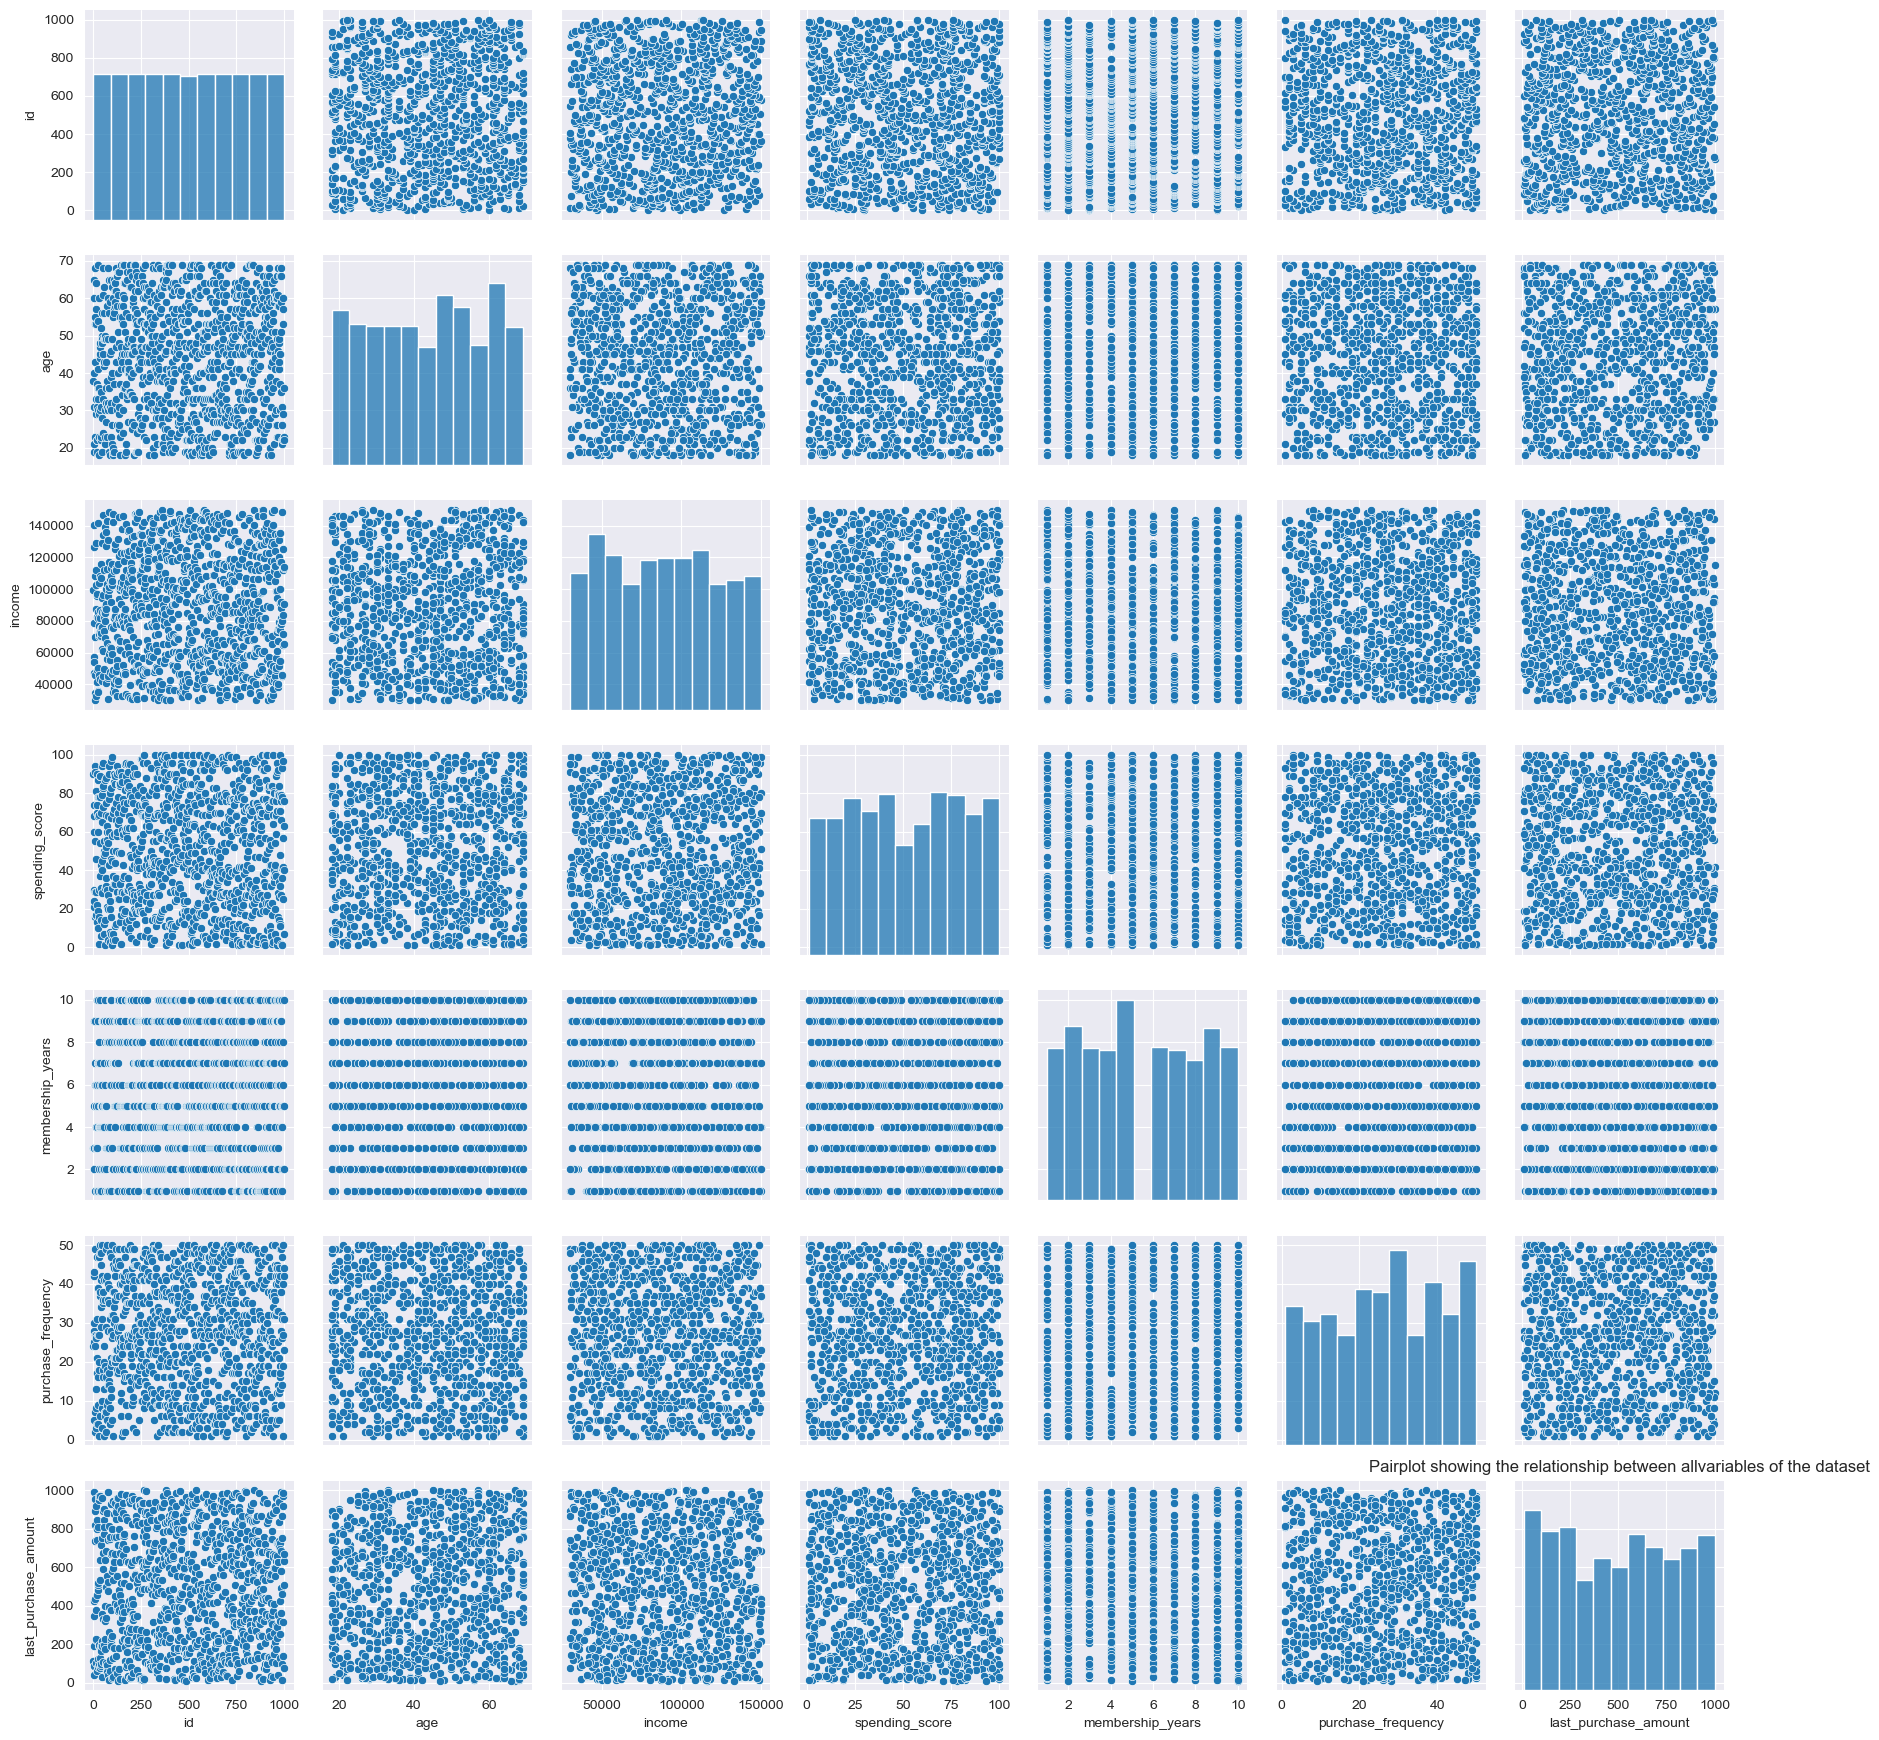

In [4]:
sns.pairplot(csd)
plt.title('Pairplot showing the relationship between allvariables of the dataset')
plt.tight_layout()
plt.savefig('Relationship_pairplot.png')
plt.show()

## Interpretation
There is no relationship between amongst all the variable meaning that there is no variable influencing the outcome of any other variable

# Feature Selection


In [45]:
# Selected features
x = csd[['income', 'spending_score']]

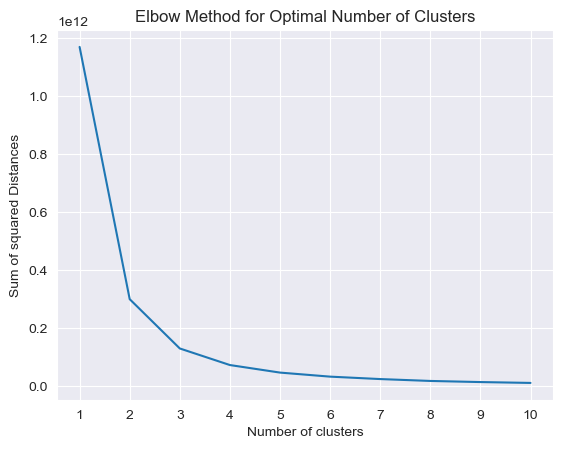

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

min_cluster_size = 1
max_cluster_size = 10

sse = []

for k in range(min_cluster_size, max_cluster_size + 1):
    kmeans = KMeans(n_clusters=k, n_init= 10)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
plt.plot(range(min_cluster_size, max_cluster_size + 1), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(min_cluster_size, max_cluster_size + 1))
plt.show()

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


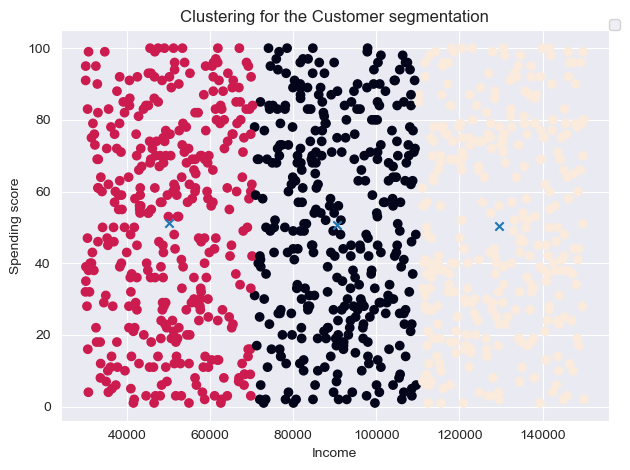

In [58]:
# Implementing the clustering algorithm

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(x)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

# print('Cluster Center: ', cluster_centers)
# print('Cluster labels: ', cluster_labels)

plt.scatter(x.values[:, 0], x.values[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], marker='x')
plt.title('Clustering for the Customer segmentation')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.legend(loc=[1,1])
plt.tight_layout()
plt.savefig('Clustering for the Customer segmentation.png')
plt.show()